In [1]:
# Data Transform
import pandas as pd 
import numpy as np 
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import classification_report, confusion_matrix


## Data Load

In [2]:
train = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [3]:
print('Train shape: ',train.shape)
print('Test shape: ',test.shape)

df = train.copy()

Train shape:  (2000, 21)
Test shape:  (1000, 21)


## Missing Value Analysis

In [4]:
# Verificando valores nulos
null_train = train.isna().sum().sum()
null_test = test.isna().sum().sum()

print('Quantidade de valores nulos dados de treino...: ', null_train)
print('Quantidade de valores nulos dados de teste...: ', null_test)

Quantidade de valores nulos dados de treino...:  0
Quantidade de valores nulos dados de teste...:  0


In [5]:
#df.profile_report(title='Report Data Mobile Price')

## Data Analysis

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


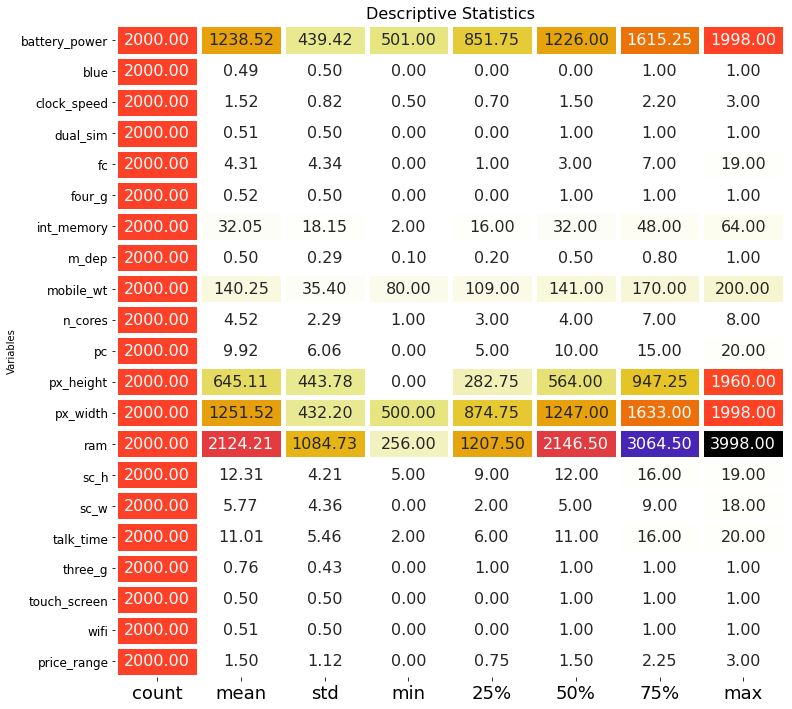

In [10]:
desc = df.describe().T

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(desc, annot=True, cmap='CMRmap_r', fmt='.02f',
            ax=ax, linewidths=5, cbar=False,
            annot_kws={'size': 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

In [11]:
# Correlation

corr = df.corr()

# cmap = sns.diverging_palette(5, 250, n=10, as_cmap=True)

# def magnify():  
#     return [dict(selector="th",
#                  props=[("font-size", "8pt")]),
#             dict(selector="td",
#                  props=[('padding', "0em 0em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "12pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '12pt')])
#             ]   

# corr.style.background_gradient(cmap, axis=1)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Correlation")\
#     .set_precision(2)\
#     .set_table_styles(magnify())

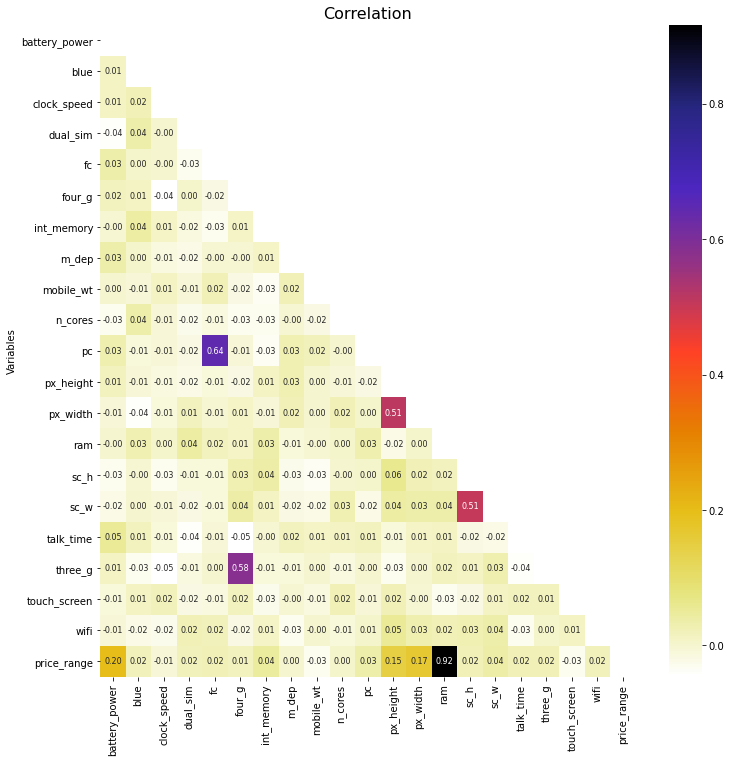

In [12]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, annot=True, cmap='CMRmap_r', mask=mask, fmt='.02f', ax=ax, annot_kws={'size': 8})
plt.ylabel("Variables")
plt.title("Correlation", size = 16)
plt.show()


## Data Visualization

Text(0, 0.5, 'Clock Speed')

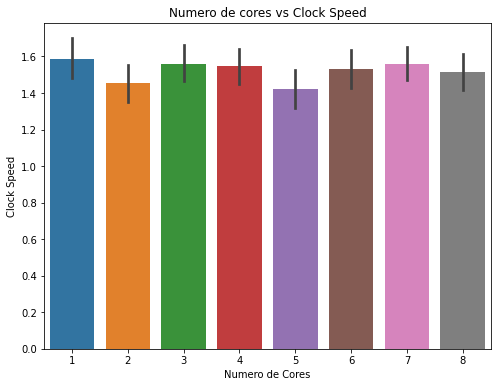

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='n_cores', y='clock_speed', data=df)
plt.title('Numero de cores vs Clock Speed')
plt.xlabel('Numero de Cores')
plt.ylabel('Clock Speed')

Text(0, 0.5, 'Int Memory')

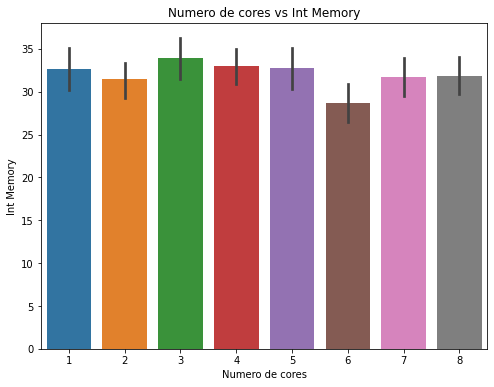

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='n_cores', y='int_memory', data=df)
plt.title('Numero de cores vs Int Memory')
plt.xlabel('Numero de cores')
plt.ylabel('Int Memory')

Text(0, 0.5, 'Ram')

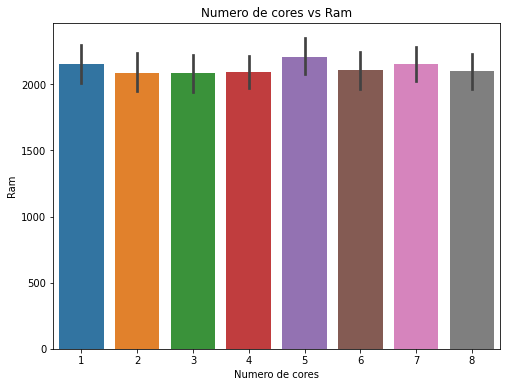

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='n_cores', y='ram', data=df)
plt.title('Numero de cores vs Ram')
plt.xlabel('Numero de cores')
plt.ylabel('Ram')

<AxesSubplot:xlabel='n_cores'>

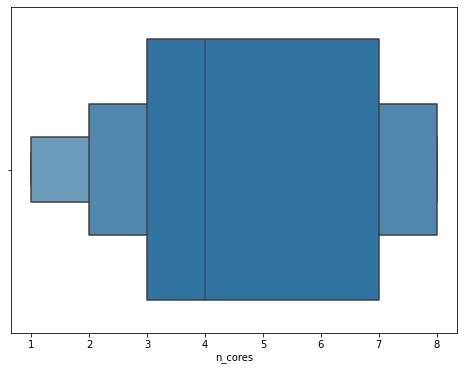

In [16]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='n_cores', data=df)

Text(0.5, 1.0, 'Distribuicao do numero de cores')

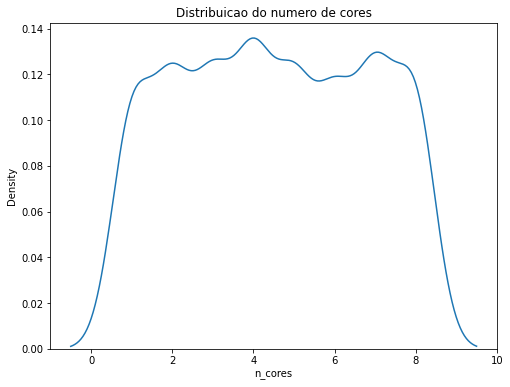

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='n_cores', data=df)
plt.title('Distribuicao do numero de cores')

Text(0, 0.5, 'Battery Power')

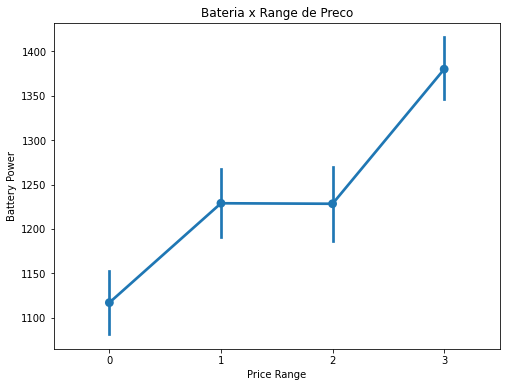

In [18]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='price_range', y='battery_power', data=df)
plt.title('Bateria vs Range de Preco')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')

Text(0, 0.5, 'Battery Power')

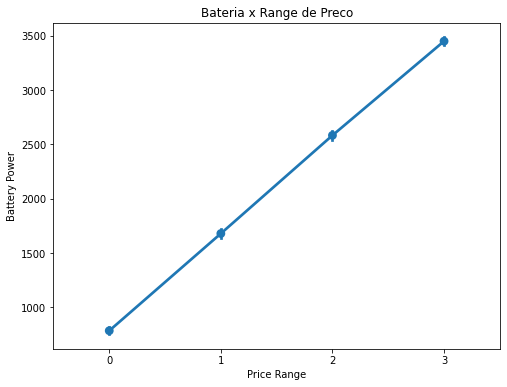

In [38]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='price_range', y='ram', data=df)
plt.title('Range de Preco vs Ram')
plt.xlabel('Price Range')
plt.ylabel('Ram')

In [101]:
def set_custom_palette(series, max_color = 'gray', other_color = 'lightgrey'):
    series.sort()
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

Text(0, 0.5, 'Ram')

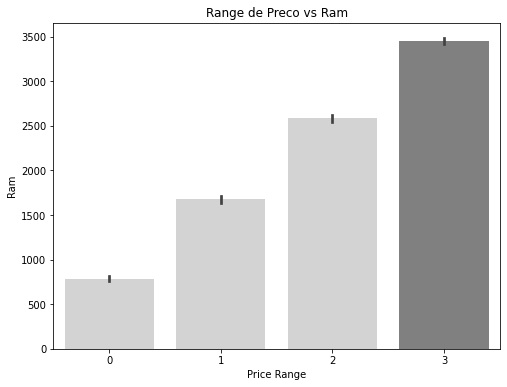

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x='price_range', y='ram', data=df, palette=set_custom_palette(df['price_range'].unique()))
plt.title('Price Range vs Ram')
plt.xlabel('Price Range')
plt.ylabel('Ram')



Text(0, 0.5, 'N cores')

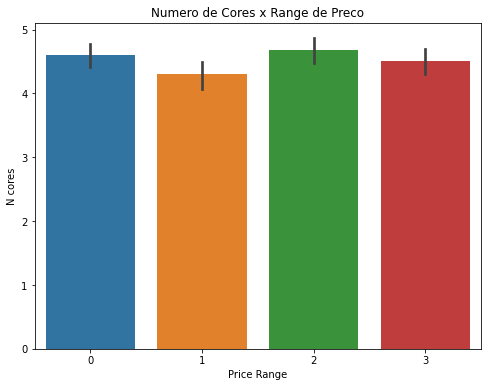

In [19]:
# Price_Range vs N_cores
plt.figure(figsize=(8, 6))
sns.barplot(x='price_range', y='n_cores', data=df)
plt.title('Numero de Cores x Range de Preco')
plt.xlabel('Price Range')
plt.ylabel('N cores')

### Splitting of Test and Train Data

In [20]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating and Training Model

## 1) Linear Regression

In [22]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.9192961986603748

## 2) KNN

In [23]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
clf.score(X_test, y_test)

0.932

## 3) SVM

In [24]:
clf = SVC(kernel='rbf').fit(X_train, y_train)
clf.score(X_test, y_test)
svm_pred = clf.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       132
           1       0.92      0.97      0.95       118
           2       0.95      0.91      0.93       120
           3       0.96      0.95      0.96       130

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



<AxesSubplot:>

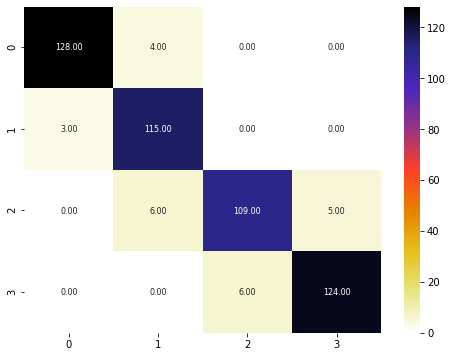

In [25]:
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='CMRmap_r', fmt='.02f', annot_kws={'size': 8})

## 4) Random Forest

In [26]:
reg = RandomForestRegressor().fit(X_train, y_train)
reg.score(X_test, y_test)
rf_pred = reg.predict(X_test)
rf_pred

array([0.08, 1.9 , 1.05, 2.99, 1.03, 1.1 , 1.74, 0.06, 2.38, 1.16, 0.02,
       0.92, 1.9 , 2.89, 2.35, 2.2 , 2.98, 3.  , 1.  , 0.04, 0.  , 1.2 ,
       0.94, 1.79, 0.06, 1.09, 2.4 , 2.08, 2.03, 0.07, 0.32, 0.  , 2.99,
       0.02, 1.08, 1.13, 2.53, 0.08, 3.  , 0.09, 1.74, 2.68, 2.21, 0.  ,
       2.61, 2.52, 1.59, 0.97, 2.99, 1.02, 3.  , 1.  , 0.  , 0.04, 0.67,
       0.67, 1.03, 2.71, 0.  , 0.  , 0.79, 3.  , 2.96, 1.1 , 0.09, 0.1 ,
       3.  , 2.99, 1.17, 1.89, 1.82, 2.37, 0.  , 1.  , 2.64, 0.  , 0.29,
       3.  , 2.05, 1.28, 2.98, 1.98, 0.99, 0.01, 1.27, 2.94, 1.54, 3.  ,
       3.  , 0.03, 2.77, 3.  , 1.95, 0.92, 2.99, 2.05, 2.04, 3.  , 1.48,
       1.17, 0.  , 0.  , 0.76, 0.37, 0.06, 2.98, 2.41, 0.02, 0.94, 1.  ,
       0.05, 0.01, 2.76, 1.47, 2.08, 1.99, 2.51, 2.43, 0.05, 2.07, 1.  ,
       2.96, 2.28, 1.18, 2.98, 2.93, 0.2 , 2.79, 0.43, 1.84, 2.93, 0.03,
       2.04, 2.07, 0.02, 2.51, 1.  , 0.09, 0.2 , 2.01, 2.69, 0.5 , 2.27,
       2.52, 0.  , 0.  , 0.05, 1.16, 1.54, 2.15, 2.

## Predizendo com o Dataset de Testes

In [27]:
df_test = test.copy()

In [28]:
df_test.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0


In [29]:
df_test = df_test.drop('id', axis=1)

In [30]:
svm_pred = clf.predict(df_test)

In [31]:
df_test['price_range'] = svm_pred

In [32]:
X = df_test.drop('price_range', axis=1)
y = df_test['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
clf_svm = SVC(kernel='rbf').fit(X_train, y_train)

In [34]:
clf_svm.score(X_test, y_test)
clf_svm_pred = clf_svm.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        63
           1       1.00      0.91      0.95        58
           2       0.95      1.00      0.97        55
           3       1.00      0.97      0.99        74

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



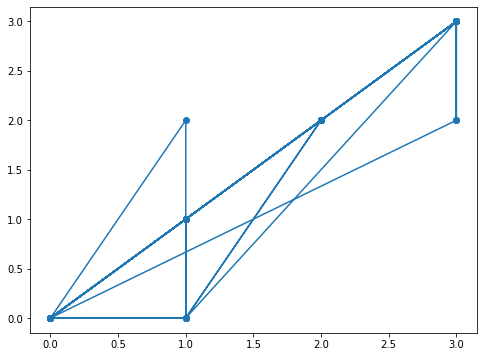

In [35]:
print(classification_report(y_test, clf_svm_pred))

plt.figure(figsize=(8, 6))
plt.plot(y_test, clf_svm_pred)
plt.scatter(y_test, clf_svm_pred)


<AxesSubplot:>

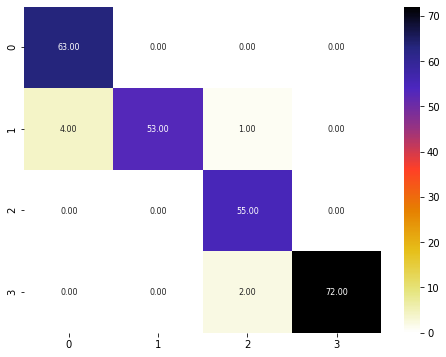

In [36]:
cm = confusion_matrix(y_test, clf_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='CMRmap_r', fmt='.02f', annot_kws={'size': 8})


In [37]:
#df_test['price_range'].to_csv('price.csv')